In [3]:
!pip install scikit-learn

In [5]:
#kutuphane yuklemesi
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [23]:
!pip install yfinance

In [24]:
# Import yfinance module
import yfinance as yf

In [33]:
#Hisse Datasi cekme
df = yf.download('SASA.IS', start='2020-01-01', end='2024-05-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1.231314,1.264722,1.229723,1.255177,1.255177,71738202
2020-01-03,1.240859,1.248813,1.202679,1.234496,1.234496,77498196
2020-01-06,1.209042,1.220178,1.197906,1.197906,1.197906,55860342
2020-01-07,1.209042,1.236086,1.209042,1.224950,1.224950,42476559
2020-01-08,1.193134,1.216996,1.189952,1.201088,1.201088,46820746
...,...,...,...,...,...,...
2024-05-10,45.720001,46.340000,44.680000,44.700001,44.700001,44451230
2024-05-13,44.740002,45.680000,44.639999,45.020000,45.020000,52791489
2024-05-14,44.959999,48.099998,44.820000,47.340000,47.340000,87707176


In [34]:
df.shape

(1094, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

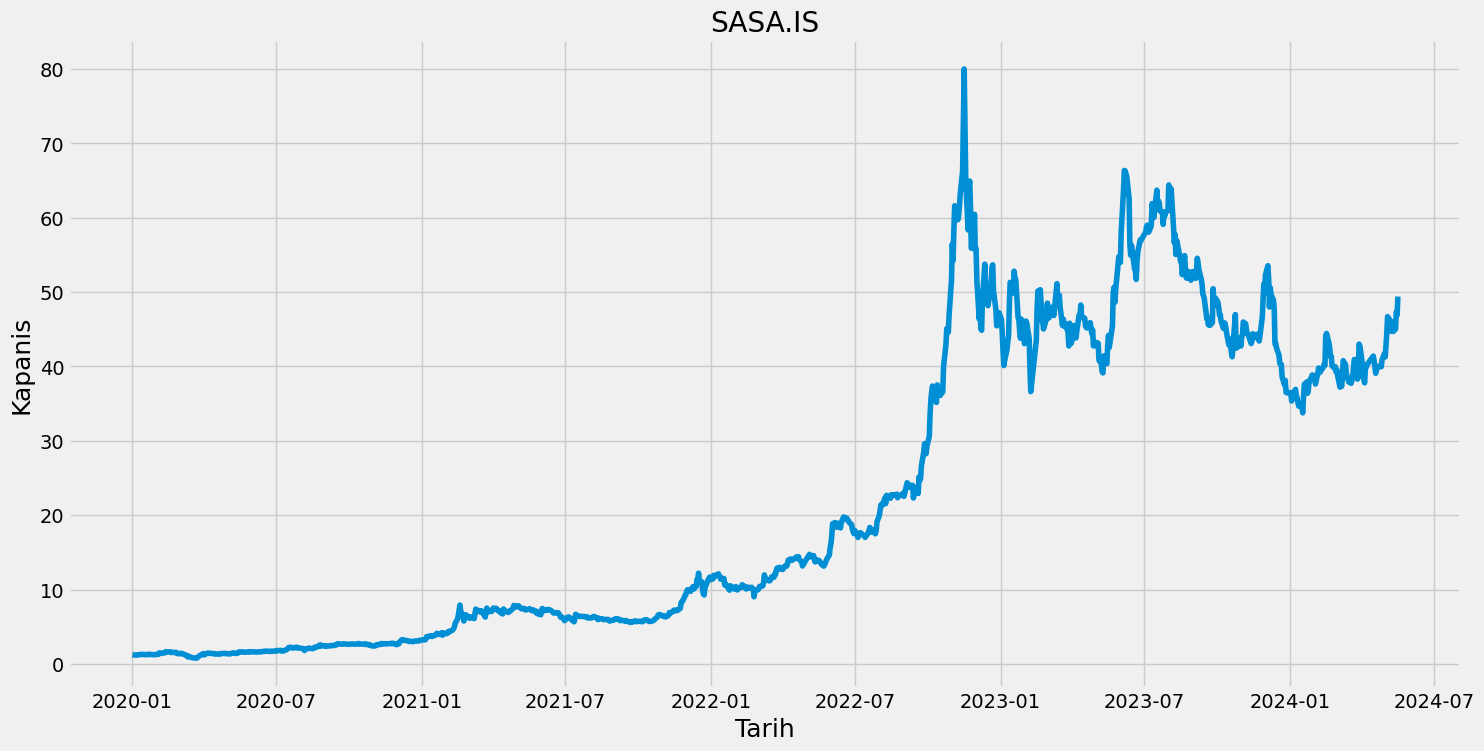

In [35]:
#Gecmis Kapanislar
plt.figure(figsize=(16,8))
plt.title('SASA.IS')
plt.plot(df['Close'])
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanis',fontsize=18)
plt.show

In [36]:
#Sadece Kapanis Sutunu olacak
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

876

In [37]:
#Olceklendirme
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00584566],
       [0.00558451],
       [0.00512248],
       ...,
       [0.58777519],
       [0.58221917],
       [0.61378756]])

In [39]:
#Data'yi ogretelim
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00584566, 0.00558451, 0.00512248, 0.00546397, 0.00516266,
       0.00570504, 0.00558451, 0.0064483 , 0.00650856, 0.00634786,
       0.00606662, 0.00590592, 0.00616706, 0.00606662, 0.00604653,
       0.00670945, 0.0062675 , 0.00600635, 0.00588583, 0.00596619,
       0.00574521, 0.00640812, 0.00624741, 0.00648848, 0.00899949,
       0.00857765, 0.00839685, 0.00863791, 0.00932091, 0.00918029,
       0.01088779, 0.01050611, 0.01066681, 0.01044584, 0.01054628,
       0.00958206, 0.00972267, 0.00958206, 0.00968249, 0.00978293,
       0.00823614, 0.00753307, 0.00773394, 0.00825623, 0.00767367,
       0.00775403, 0.00691032, 0.00540371, 0.00429886, 0.00429886,
       0.00194855, 0.00289269, 0.00166732, 0.00070308, 0.0005022 ,
       0.00030131, 0.00044193, 0.        , 0.00096423, 0.00204899])]
[0.003254272793377082]

[array([0.00584566, 0.00558451, 0.00512248, 0.00546397, 0.00516266,
       0.00570504, 0.00558451, 0.0064483 , 0.00650856, 0.00634786,
       0.00606662, 0.00590592, 0.0

In [40]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
#Yeniden Data olusturma
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(816, 60, 1)

In [42]:
#LSTM Modulu Olusturalim
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
#Derleme Modeli Olusturalim
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

816/816 [==============================] - 26s 27ms/step - loss: 0.0027


In [45]:
#Test Datasi olusturalim
test_data = scaled_data[training_data_len - 60:, :]
X_test = []
y_test =  scaled_data[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [46]:
#Data ice aktarim
X_test = np.array(X_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicitions = model.predict(X_test)
predicitions = scaler.inverse_transform(predicitions)

7/7 [==============================] - 1s 15ms/step


In [49]:
rmse = np.sqrt(np.mean(predicitions - y_test)**2)
rmse

43.68922341061161

<ipython-input-50-2c6c646b53e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicitions


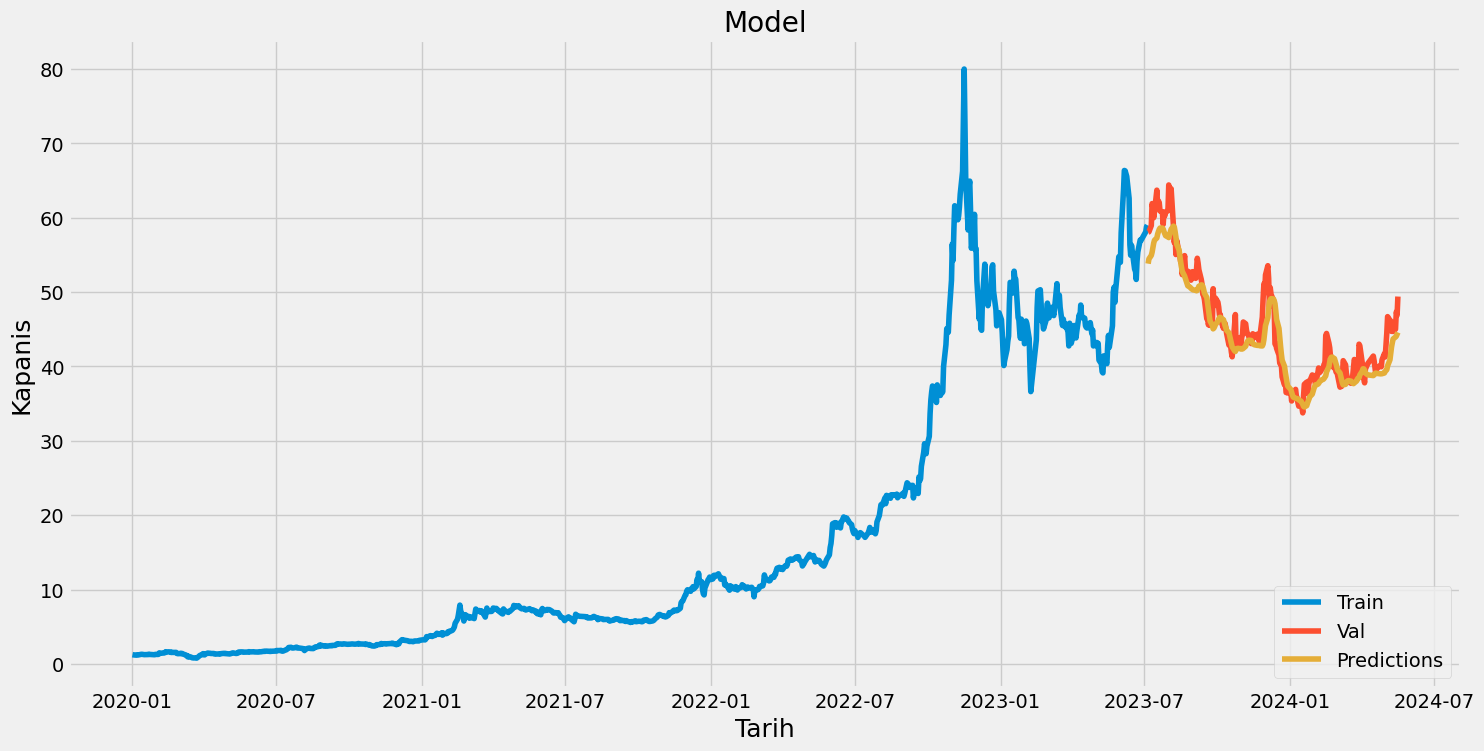

In [50]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predicitions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanis',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
valid

,Close,Predictions
Date,,
2023-07-06,58.049999,53.818531
2023-07-07,58.099998,54.454891
2023-07-10,58.950001,54.936539
2023-07-11,61.900002,55.355717
2023-07-12,61.299999,55.979744
...,...,...
2024-05-10,44.700001,43.703033
2024-05-13,45.020000,43.956238
2024-05-14,47.340000,44.079762


In [60]:
df = yf.download('SASA.IS', start='2020-01-01', end='2024-05-17')
new_df = sasa_quote.filter(['Close'])
last_60_days = new_df[-60:].values.tolist()
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 27ms/step
[[45.04933]]


In [65]:
sasa_quote = yf.download('SASA.IS', start='2020-01-01', end='2024-05-18')
print(sasa_quote['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2020-01-02     1.255177
2020-01-03     1.234496
2020-01-06     1.197906
2020-01-07     1.224950
2020-01-08     1.201088
                ...    
2024-05-13    45.020000
2024-05-14    47.340000
2024-05-15    46.900002
2024-05-16    49.400002
2024-05-17    50.000000
Name: Close, Length: 1095, dtype: float64
